# Laboratorium 7 - Klasyfikacja, Regresja Logistyczna, SVM

Celem laboratorium jest praktyczna implementacja podstawowego algorytmu klasyfikacji: regresji logistycznej, oraz wykorzystanie gotowej implementacji maszyny wektorów nośnych (support vector machine - SVM). Zakładam, że zagadnienie klasyfikacji oraz podstawy teoretyczne regresji logistycznej oraz SVM są znane z wykładu.

Zacznijmy od importu bibliotek oraz wygenerowania przykładowego zbioru punktów:

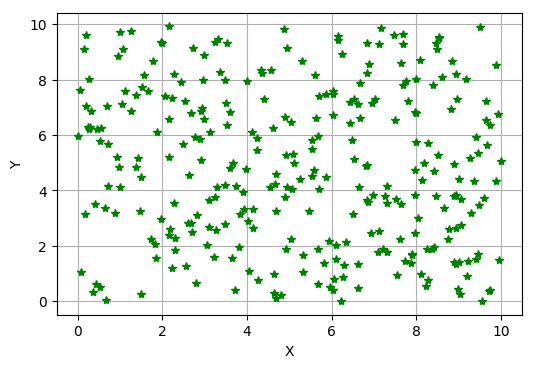

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
import sklearn.svm as svm

%matplotlib inline

np.random.seed(12345)

n_points = 300
X = np.random.rand(n_points, 2)*10

plt.figure(dpi=100)
plt.plot(X[:, 0], X[:, 1], "g*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Podzielmy wygenerowane punkty na dwa zbiory dzielące go na klasy.
Niech pierwszy zbiór dzieli punkty na punkty powyżej prostej o równaniu y = x oraz poniżej tej prostej.

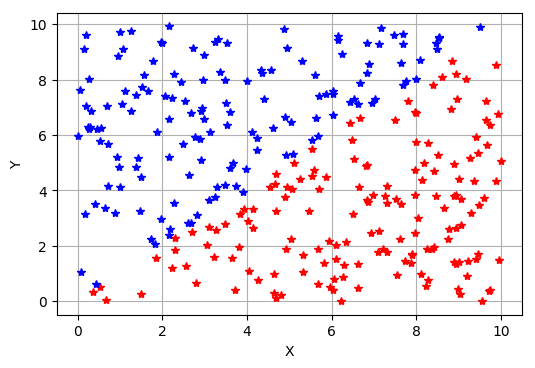

In [2]:
y1 = X[:, 1] > X[:, 0]

plt.figure(dpi=100)
plt.plot(X[:, 0][y1 == 0], X[:, 1][y1 == 0], "r*")
plt.plot(X[:, 0][y1 == 1], X[:, 1][y1 == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

W ten sposób dokonaliśmy podziału wygenerowanego zbioru na dwie klasy - klasy punktów niebieskich i czerwonych. Dokonaj analogicznego podziału w taki sposób, aby punkty leżące wewnątrz okręgu o środku w punkcie (5,5) i promieniu 2 należały do klasy niebieskiej, a punkty leżące na zewnątrz tego okręgu należały do klasy czerwonej.

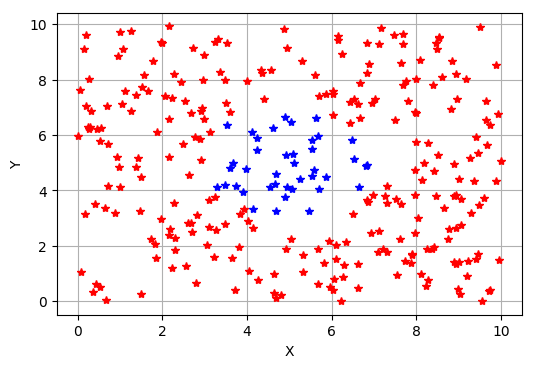

In [3]:
# TO DO

# Przykładowy rezultat

W ten sposób zostały wygenerowane dwa zbiory, na których będziemy dokonywać klasyfikacji, tj. próbować określić do której klasy należy nowo wygenerowany punkt.
W tym celu wygenerujmy nowy zbiór punktów, będący zbiorem testowym:

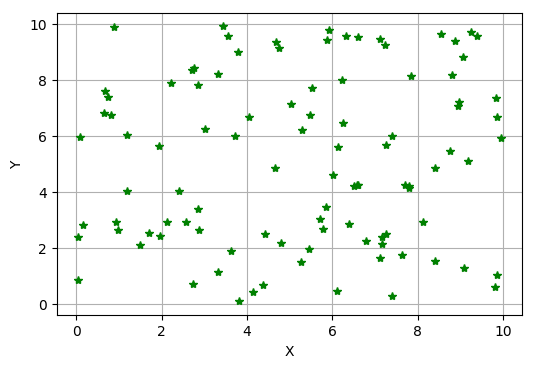

In [4]:
X_test = np.random.rand(100, 2)*10
plt.figure(dpi=100)
plt.plot(X_test[:, 0], X_test[:, 1], "g*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Zacznijmy od próby klasyfikacji zbioru testowego korzystajac z regresji logistycznej. Korzystając z funkcji dostępnej w bibliotece sklearn użyj regresji logistycznej, aby dokonać klasyfikacji wygenerowanego zbioru testowego zarówno dla podziału pierwszego (prosta odzielające) jak i podziału drugiego (wnętrze okręgu).

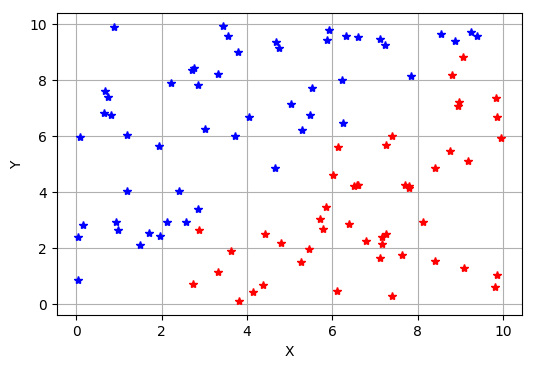

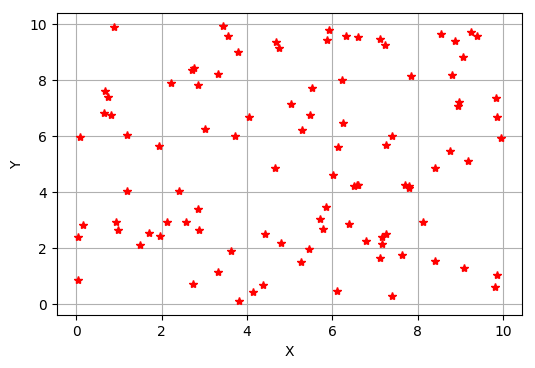

In [5]:
# TO DO

Wygląda na to, że klasyfikacja "działa" poprawnie dla podziału na klasy rozdzielone prostą, natomiast nie działa w ogóle dla okręgu. Dlaczego? Jak liczbowo ocenić jakość klasyfikacji? Zapoznaj się z pojęciem macierzy pomyłek, błędów I, II rodzaju, F1-Score. Zanim przejdziemy do poprawnej klasyfikacji dla okręgu, dokonaj samodzielnej implementacji regresji logistycznej operatej o metodę spadku gradientowego.

In [6]:
def sigmoid(x):
    # TO DO
    pass
    
def loss(h, y):
    # TO DO
    pass

def logistic_regression_ours(X, y, learning_rate=0.01, num_iters=100):
    """
    X - macierz próbek/cech
    y - wektor przyjmowanych wartości  
    """
    # TO DO
    pass

def classify(X, theta):
    """
    X - macierz próbek/cech
    theta - parametry modelu
    """
    # TO DO
    pass

Przykładowy rezultat:

Current loss:  0.6931471805599453
Current loss:  0.2743968709848971
Current loss:  0.530250311175322
Current loss:  1.7096312302099788
Current loss:  1.627846232493778
Current loss:  1.0979570351035226
Current loss:  0.5448571480117107
Current loss:  0.3452629139048801
Current loss:  0.34166214120103744
Current loss:  0.2230477746353497
Current loss:  0.230305858193364
Current loss:  0.17203120831177812
Current loss:  0.17542418036374785
Current loss:  0.14416588676258943
Current loss:  0.14436995661030938
Current loss:  0.1259914537517388
Current loss:  0.12446619888492828
Current loss:  0.11333921257405137
Current loss:  0.11118632258572883
Current loss:  0.10449022376817514
Current loss:  0.10239770690813846
Current loss:  0.09844214039719144
Current loss:  0.09673617380827863
Current loss:  0.09443038977062569
Current loss:  0.09317506044583955
Current loss:  0.09181816547857351
Current loss:  0.09093554428892986
Current loss:  0.09009612618267934
Current loss:  0.08946666083652367

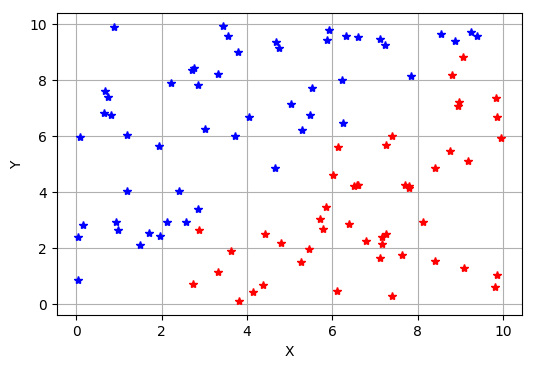

In [7]:
lr_own = logistic_regression_ours(X, y1, learning_rate=0.6, num_iters=50)
print("Model coefficients: ", lr_own)
result = classify(X_test, lr_own)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][result == 0], X_test[:, 1][result == 0], "r*")
plt.plot(X_test[:, 0][result == 1], X_test[:, 1][result == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Wróćmy do problemu do klasyfikacji punktów wewnątrz / na zewnątrz okręgu. Regresja logistyczna nie jest w stanie bezpośrednio poradzić sobie z tym problemem (chociaż można dokonać transformacji danych w taki sposób, aby było to możliwe, np. poprzez transformacje do współrzędnych biegunowych). Spróbuj dokonać klasyfikacji korzystając z gotowej implemetnacji SVM w bibliotece sklearn (dobierz odpowiednie jądro i jego parametry). W jaki sposób jądro SVM wpływa na zdolność klasyfikacji? Jak wpływają na to poszczególne parametry? Dokonaj zagęszczenia zbioru testowego, aby zobaczyć dokładne punkty podziału.

Przykładowy rezultat:

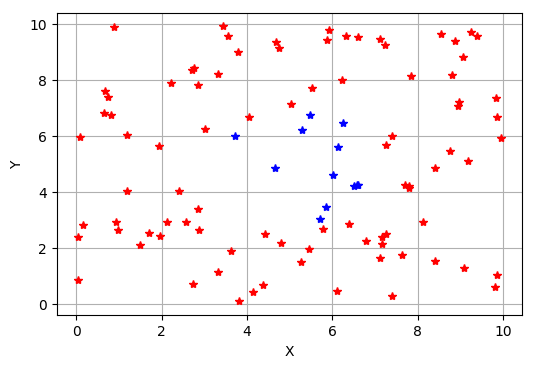

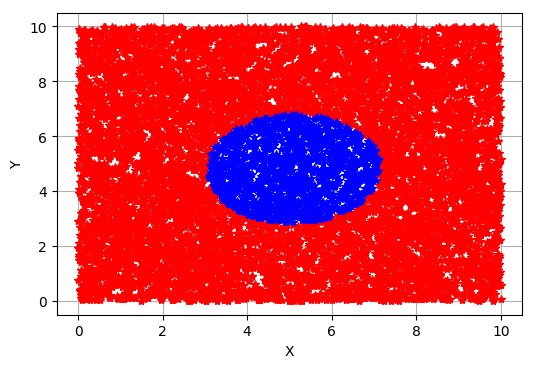

In [8]:
# TO DO

SVM jest potężnym narzędziem do klasyfikacji dowolnych danych, szczególnie wielowymiarowych i liniowo nieseparowalnych. Obecnie jest najczęściej stosowany jako ostatnia warstwa decyzyjna w sieciach neuronowych z uwagi na jego zdolność do maksymalizacji marginesu błędu, co nie jest oczywiste np. dla warstw afinicznych w sieciach neuronowych (o czym pewnie będą zajęcia na kolejnych semestrach).